Exploring how Bitcoin market sentiment (Fear vs Greed) influences
trader behaviour and performance on Hyperliquid.
Objectives are to check:
- Whether trader PnL differs on Fear vs Greed days  
- Whether traders change leverage, position-taking, or trade size  
- Whether long/short bias shifts with sentiment  
- Whether certain trader segments behave meaningfully differently

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")

In [92]:
# Load sentiment (Fear/Greed) and historical trades
sentiment = pd.read_csv("/Users/ishit.chhabra/Desktop/trader-sentiment-analysis/data/fear_greed_index.csv", sep=",")
trades = pd.read_csv("/Users/ishit.chhabra/Desktop/trader-sentiment-analysis/data/historical_data.csv", sep=",")

In [ ]:
sentiment["date"] = pd.to_datetime(sentiment["date"], errors="coerce")
trades["Timestamp IST"] = pd.to_datetime(trades["Timestamp IST"], errors="coerce")

# To extract date from Timestamp IST
trades["date"] = trades["Timestamp IST"].dt.date
trades["date"] = pd.to_datetime(trades["date"])

In [ ]:
with open("/Users/ishit.chhabra/Desktop/trader-sentiment-analysis/data/historical_data.csv") as f:
    print(f.readline())

Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp



In [41]:
sentiment.head(), trades.head()

(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

Summarizing the datasets

In [94]:
print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)

print("\nMissing values — Sentiment:")
print(sentiment.isna().sum())

print("\nMissing values — Trades:")
print(trades.isna().sum())

print("\nDuplicate rows:")
print("Sentiment duplicates:", sentiment.duplicated().sum())
print("Trades duplicates:", trades.duplicated().sum())

Sentiment shape: (2644, 4)
Trades shape: (211224, 17)

Missing values — Sentiment:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values — Trades:
Account                  0
Coin                     0
Execution Price          0
Size Tokens              0
Size USD                 0
Side                     0
Timestamp IST       131999
Start Position           0
Direction                0
Closed PnL               0
Transaction Hash         0
Order ID                 0
Crossed                  0
Fee                      0
Trade ID                 0
Timestamp                0
date                131999
dtype: int64

Duplicate rows:
Sentiment duplicates: 0
Trades duplicates: 0


Merging datsets on **date** column

In [95]:
merged = trades.merge(sentiment, on="date", how="left")

merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed


In [96]:
print("Unique trade days:", merged["date"].nunique())
print("Sentiment distribution:\n", merged["classification"].value_counts(dropna=False))

Unique trade days: 188
Sentiment distribution:
 classification
NaN              175360
Fear              13869
Greed             11292
Extreme Greed      5621
Neutral            2756
Extreme Fear       2326
Name: count, dtype: int64


Daily Trader PnL 

In [97]:
daily_pnl = merged.groupby(["Account", "date"])["Closed PnL"].sum().reset_index()
daily_pnl.head()

,Account,date,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-06-12,-175611.000056
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-03,9482.221441
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-02,76710.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-03-02,101011.685664


Win rate per trader
(**Trade PnL > 0 is a win**)

In [98]:
merged["win"] = (merged["Closed PnL"] > 0).astype(int)

win_rate = merged.groupby("Account")["win"].mean().reset_index()
win_rate = win_rate.rename(columns={"win": "win_rate"})
win_rate.head()

,Account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


Average Trade Size

In [99]:
avg_trade_size = merged.groupby("Account")["Size Tokens"].mean().reset_index()
avg_trade_size.head()

,Account,Size Tokens
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16.167205
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,503.067911
2,0x271b280974205ca63b716753467d5a371de622ab,190.601402
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,2073.877613
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,27144.277189


Number of Trades per Day
(comparing Fear vs Greed Activity Levels)

In [142]:
trades_per_day = merged.groupby(["date", "classification"])["Account"].count().reset_index()
trades_per_day = trades_per_day.rename(columns={"Account": "num_trades"})
trades_per_day.head()

,date,classification,num_trades
0,2023-01-05,Fear,3
1,2023-05-12,Neutral,9
2,2024-01-01,Greed,18
3,2024-01-02,Greed,6
4,2024-01-03,Greed,137


Long / Short Ratio

In [143]:
ls = merged.groupby(["date", "classification", "Side"]).size().unstack(fill_value=0)

# Ensure BUY and SELL exist
if "BUY" in ls.columns and "SELL" in ls.columns:
    ls["long_short_ratio"] = ls["BUY"] / (ls["SELL"] + 1)
else:
    print("Check Side unique values:", merged["Side"].unique())

ls = ls.reset_index()
ls.head()

Side,date,classification,BUY,SELL,long_short_ratio
0,2023-01-05,Fear,3,0,3.000000
1,2023-05-12,Neutral,7,2,2.333333
2,2024-01-01,Greed,10,8,1.111111
3,2024-01-02,Greed,6,0,6.000000
4,2024-01-03,Greed,37,100,0.366337


### Fear vs Greed — Behavior & Performance Analysis

PnL Distribution by Sentiment

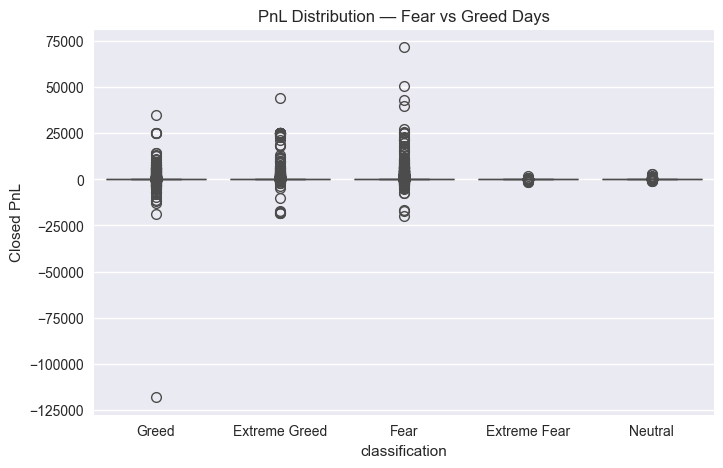

In [103]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x="classification", y="Closed PnL")
plt.title("PnL Distribution — Fear vs Greed Days")
plt.show()

In [139]:
merged.groupby("classification")["Closed PnL"].describe()

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,2326.0,1.891632,76.727713,-1430.889856,0.0,0.00000,0.298102,2020.000000
Extreme Greed,5621.0,205.816345,1861.557119,-18360.670070,0.0,0.96048,30.153710,44223.451870
Fear,13869.0,128.287950,1342.348497,-19841.240140,0.0,0.00000,8.201820,71535.716740
Greed,11292.0,53.988003,1399.468182,-117990.104100,0.0,0.00000,13.441364,34903.817100
Neutral,2756.0,27.088803,142.945889,-1032.981540,0.0,0.00000,9.267691,2979.554311


- Extreme Greed shows the highest average PnL, indicating traders benefit from strong upward momentum.

- Fear and Greed periods have large standard deviations, reflecting high volatility and big swings in profit and loss.

- Extreme Fear and Neutral days are calmer, with tight clustering around zero.

Win Rate by Sentiment

In [140]:
merged.groupby("classification")["win"].mean()

classification
Extreme Fear     0.292777
Extreme Greed    0.553282
Fear             0.381787
Greed            0.435707
Neutral          0.494920
Name: win, dtype: float64

- Traders win more often during Extreme Greed conditions.

- Win rate progressively declines as market sentiment shifts from Greed → Fear → Extreme Fear.

- Neutral days have surprisingly balanced outcomes (almost 50/50).

- Extreme Fear conditions are hardest to trade, with less than 30% win rate.

Drowdown Proxy (**min PnL per day / per account**)

In [141]:
drawdown_proxy = merged.groupby("classification")["Closed PnL"].min()
drawdown_proxy

classification
Extreme Fear      -1430.889856
Extreme Greed    -18360.670070
Fear             -19841.240140
Greed           -117990.104100
Neutral           -1032.981540
Name: Closed PnL, dtype: float64

The largest downside tail risk happens during Greed days, not Fear days.

Greed days show both:

* Large upside opportunities

* Extreme downside risk

This suggests that traders may overextend during Greed conditions (larger positions, higher leverage), leading to larger blow-ups.

- Fear/Extreme Fear have small worst losses, meaning market movements are smaller.

- Neutral periods remain the safest, with very limited downside.


Trade Frequency over time

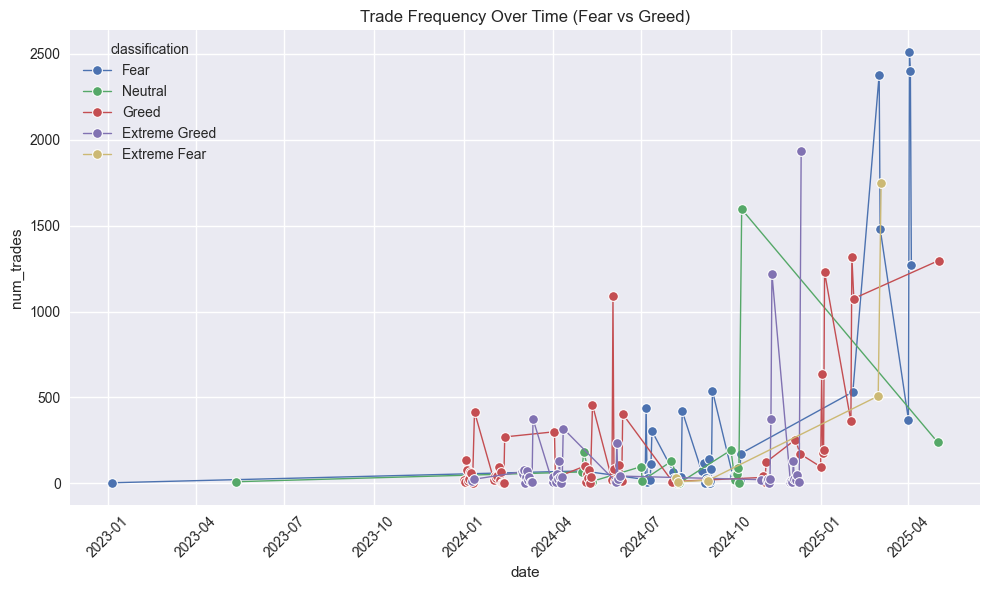

In [104]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=trades_per_day.sort_values("date"),
    x="date",
    y="num_trades",
    hue="classification",
    marker="o",
    estimator=None,
    lw=1
)

plt.title("Trade Frequency Over Time (Fear vs Greed)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Long/Short Ratio by Sentiment

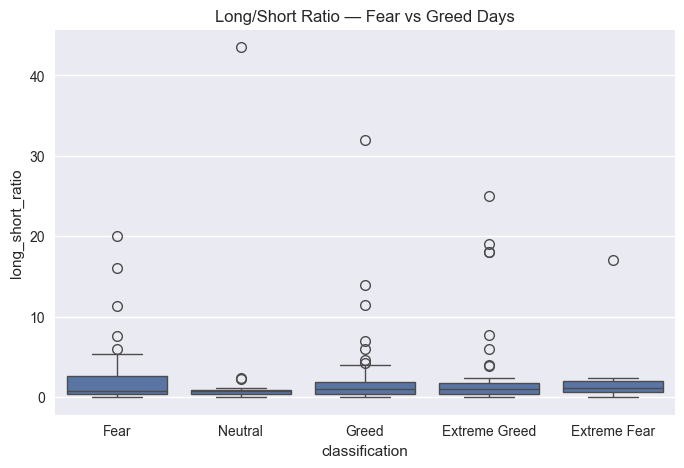

In [105]:
plt.figure(figsize=(8,5))
sns.boxplot(data=ls, x="classification", y="long_short_ratio")
plt.title("Long/Short Ratio — Fear vs Greed Days")
plt.show()

The Greed and Extreme Greed boxplots show several large positive long/short ratio outliers (values > 10, 20, and even >40).
This means that on these days:
- Long trades outnumber short trades significantly
- Traders position aggressively on the long side
- Market optimism is directly reflected in trade direction. 

Typical trader psychology is also this:  bullish sentiment → long-dominated positioning.

**Leverage / Position Exposure = Start Position × Execution Price**

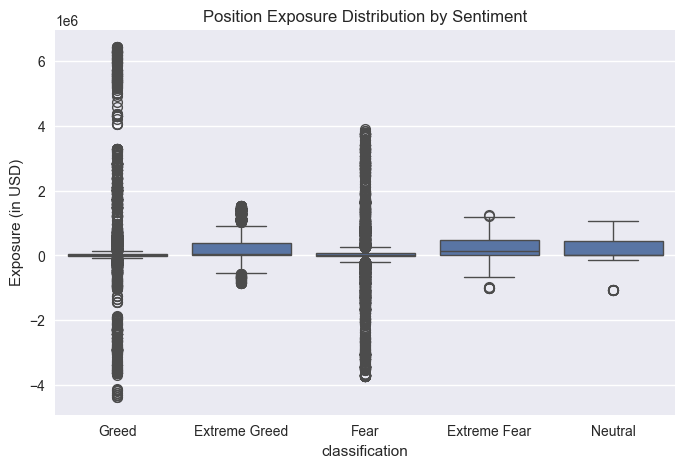

In [106]:
merged["Exposure"] = merged["Start Position"] * merged["Execution Price"]

plt.figure(figsize=(8,5))
sns.boxplot(
    data=merged,
    x="classification",
    y="Exposure"
)
plt.title("Position Exposure Distribution by Sentiment")
plt.ylabel("Exposure (in USD)")
plt.show()

This shows that during Greed periods:

- Traders take the largest positions
- Market optimism drives leveraged, high-risk bets
- Both long and short exposures become sizable

This matches the large downside tail risk observed earlier (loss of −117k on Greed days).

Compared to Greed days:

- Extreme Greed exposures cluster around lower ranges
- Fewer wild outliers
- Boxplot is more compact

This shows that during Extreme Greed, traders take larger positions than in Fear or Neutral but they maintain more structurally consistent exposure levels than in Greed.

### Trader Segmentation

by Trade Size (Small/ Medium/ Large)

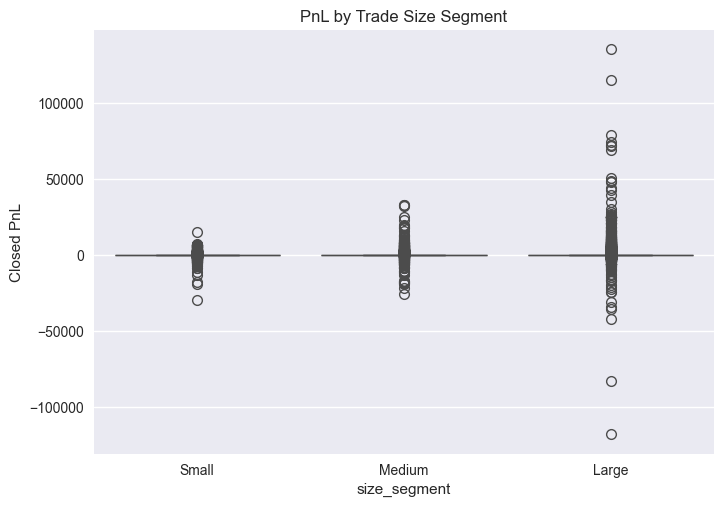

In [107]:
merged["size_segment"] = pd.qcut(merged["Size Tokens"], 3, labels=["Small","Medium","Large"])

sns.boxplot(data=merged, x="size_segment", y="Closed PnL")
plt.title("PnL by Trade Size Segment")
plt.show()

by Activity Segmentation (Low / Medium / High)

In [108]:
trade_count = merged.groupby("Account").size().reset_index(name="trade_count")
trade_count["activity_segment"] = pd.qcut(
    trade_count["trade_count"], 3,
    labels=["Low Activity", "Medium Activity", "High Activity"]
)
trade_count.head()

,Account,trade_count,activity_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,Medium Activity
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280,High Activity
2,0x271b280974205ca63b716753467d5a371de622ab,3809,Medium Activity
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311,High Activity
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239,Medium Activity


Consistency Segmentation (Win Rate)

In [109]:
consistent = win_rate.copy()
consistent["consistency_segment"] = pd.qcut(
    consistent["win_rate"], 3,
    labels=["Low Consistency", "Medium Consistency", "High Consistency"]
)
consistent.head()

,Account,win_rate,consistency_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612,Medium Consistency
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720,High Consistency
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917,Low Consistency
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585,Medium Consistency
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914,High Consistency


### Startegy Ideas / Rules of Thumb

1. Leverage Adjustment Based on Sentiment Extremes:

        Reduce leverage during Greed days; increase leverage slightly during Extreme Greed & neutral days.
- Greed days have the highest downside tail risk (max loss = −117,990), meaning traders tend to overextend with oversized positions.
- Exposure charts show that Greed has wild, uncontrolled leverage spikes, making it riskier than Extreme Greed.
- Extreme Greed shows high but structured exposures (narrower distribution), suggesting more trend-following and less chaotic volatility.
- Neutral periods produce low volatility and low drawdowns, making mild leverage safer.


2. Directional Bias Rules Based on Sentiment:

        Increase long exposure during Greed/Extreme Greed; reduce directional bets and stay balanced during Fear/Extreme Fear.
- Long/short ratio chart shows strong long bias during Greed & Extreme Greed.
- Win rate also increases with positive sentiment (Extreme Greed = 55% win rate).
- Fear & Extreme Fear show balanced or near-neutral long/short ratios, meaning markets are indecisive or mean-reverting during these periods.
- Extreme Fear PnL distribution is tight and low volatility — better suited for scalping or delta-neutral strategies.


3. Trade Frequency and Position Size Adjustment

        Increase trade frequency during trend sentiment (Extreme Greed); decrease during unstable sentiment (Fear & Extreme Fear).
- Extreme Greed shows high PnL mean and high win rate -> ideal for scaling up frequency.
- Fear days have large exposure spikes but low win rate -> avoid overtrading.
- Extreme Fear shows tight PnL distribution and low upside, so high frequency yields diminishing returns.

### Predictive Model

In [120]:
# Target: whether the trade's PnL is positive
merged["target"] = (merged["Closed PnL"] > 0).astype(int)

merged["target"].value_counts()

target
0    124355
1     86869
Name: count, dtype: int64

In [121]:
merged["Exposure"] = merged["Start Position"] * merged["Execution Price"]

Trade Direction Encoding (Buy/ Sell)

In [122]:
merged["is_buy"]  = (merged["Side"] == "BUY").astype(int)
merged["is_sell"] = (merged["Side"] == "SELL").astype(int)

Position Direction Encoding (Long/ Short)

In [123]:
merged["is_long"]  = (merged["Direction"] == "LONG").astype(int)
merged["is_short"] = (merged["Direction"] == "SHORT").astype(int)

In [124]:
merged["sentiment_code"] = merged["classification"].astype("category").cat.codes

Trade Count per Account

In [125]:
account_activity = merged.groupby("Account").size().reset_index(name="account_trade_count")
merged = merged.merge(account_activity, on="Account", how="left")

In [126]:
features = [
    "Size Tokens",
    "Size USD",
    "Execution Price",
    "Exposure",
    "is_buy",
    "is_sell",
    "is_long",
    "is_short",
    "sentiment_code",
    "account_trade_count"
]

X = merged[features]
y = merged["target"]

To avoid data leakage from the same trader appearing in both training and testing, we split the data by Account, ensuring each trader only appears in 1 set.

In [133]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)

for train_idx, test_idx in gss.split(X, y, groups=merged["Account"]):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

Random Forest Classifier is a good choice here because of it's ability to capture nonlinear relationships without requiring heavy preprocessing.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",3
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [135]:
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9371937996948037


**~ 93.7% model accuracy**

In [136]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[15971  1108]
 [ 1238 19036]]

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     17079
           1       0.94      0.94      0.94     20274

    accuracy                           0.94     37353
   macro avg       0.94      0.94      0.94     37353
weighted avg       0.94      0.94      0.94     37353



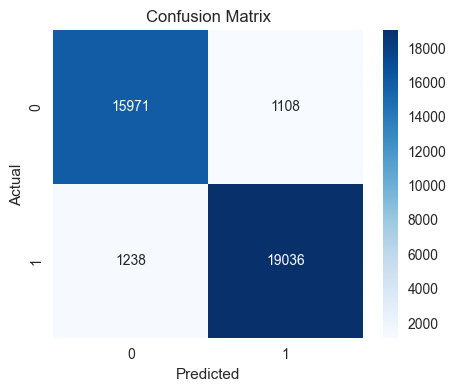

In [137]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The confusion matrix and classification report show strong, balanced performance across both classes, with high precision and recall.